# Introduction to Portfolio Theory: Prices vs Returns #

In [29]:
# Import Libraries

# Data Management
import pandas as pd
import numpy as np

# Statistics
from scipy.stats import probplot
from scipy.stats import skew, kurtosis
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import jarque_bera
from scipy.stats import anderson

# Visualization
import matplotlib.pyplot as plt

In [2]:
# Define a function to import data from the stocks files

def import_financial_data(
    ticker: str,
):

    # Check the ticker for Upper Cases
    ticker = ticker if ticker.isupper() else ticker.upper()

    # Import data
    df = pd.read_csv(rf"..\stocks\{ticker}.csv")

    # Set the Index
    df = df.set_index('Date')
    df.index = pd.to_datetime(df.index)

    df_useful_data = df[['Open Price', 'High Price', 'Low Price', 'Close Price']]

    df_useful_data = df_useful_data.rename(columns={
        "Open Price":"Open",
        "High Price":"High",
        "Low Price":"Low",
        "Close Price":"Close",
    })

    # Drop NaN's
    df_useful_data.dropna(inplace = True)

    return df_useful_data.loc["2020-01-01":]

In [3]:
# Amazon Data
df_amzn = import_financial_data("AMZN")

df_amzn

,Open,High,Low,Close
Date,,,,
2020-01-02,93.7500,94.9005,93.2120,94.9005
2020-01-03,93.2505,94.3005,93.2500,93.7485
2020-01-06,93.0000,95.1665,93.0000,95.1440
2020-01-07,95.2250,95.6875,94.6245,95.3430
2020-01-08,94.9020,95.5355,94.3430,94.5985
...,...,...,...,...
2024-10-22,188.1300,191.5200,186.9750,189.7000
2024-10-23,188.8500,189.1600,183.7000,184.7100
2024-10-24,185.3300,187.1000,183.8650,186.3800


In [4]:
# Amazon Data
df_nvda = import_financial_data("NVDA")

df_nvda

,Open,High,Low,Close
Date,,,,
2020-01-02,5.97125,5.99775,5.91875,5.99775
2020-01-03,5.87500,5.94375,5.85300,5.90175
2020-01-06,5.80900,5.93125,5.78275,5.92650
2020-01-07,5.95500,6.04400,5.90975,5.99825
2020-01-08,5.99400,6.05050,5.95400,6.00950
...,...,...,...,...
2024-10-22,142.97000,144.41000,141.78000,143.59000
2024-10-23,142.00000,142.43000,137.46000,139.56000
2024-10-24,140.82000,141.35000,138.47000,140.41000


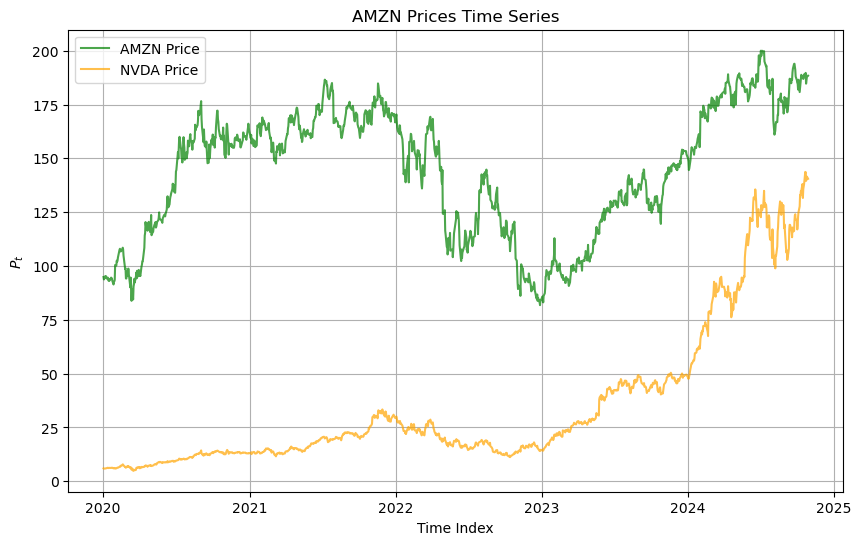

In [5]:
# Time Series Graphs for Prices

plt.figure(figsize=(10, 6))
plt.plot(df_amzn['Close'], label='AMZN Price', color='green', alpha=0.7)
plt.plot(df_nvda['Close'], label='NVDA Price', color='orange', alpha=0.7)

# Config
plt.title('AMZN Prices Time Series')
plt.xlabel('Time Index')
plt.ylabel('$P_t$')
plt.legend()

# Show
plt.grid(True)
plt.show()

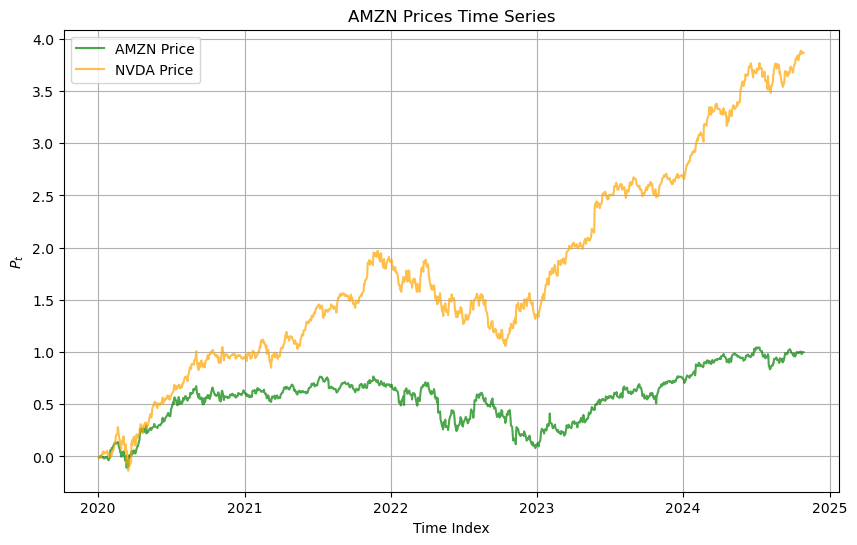

In [6]:
# Time Series Graphs for Cumulative Returns

plt.figure(figsize=(10, 6))
plt.plot(df_amzn['Close'].pct_change().cumsum(), label='AMZN Price', color='green', alpha=0.7)
plt.plot(df_nvda['Close'].pct_change().cumsum(), label='NVDA Price', color='orange', alpha=0.7)

# Config
plt.title('AMZN Prices Time Series')
plt.xlabel('Time Index')
plt.ylabel('$P_t$')
plt.legend()

# Show
plt.grid(True)
plt.show()


In [7]:
# Let us calculate the returns and log returns

df_nvda['Returns'] = df_nvda['Close'].pct_change(1).mul(100)

# Log Returns

df_nvda['Log_Returns'] = np.log(df_nvda['Close'] / df_nvda['Close'].shift(1)).mul(100)

df_nvda.dropna(inplace=True)

df_nvda

,Open,High,Low,Close,Returns,Log_Returns
Date,,,,,,
2020-01-03,5.87500,5.94375,5.85300,5.90175,-1.600600,-1.613548
2020-01-06,5.80900,5.93125,5.78275,5.92650,0.419367,0.418490
2020-01-07,5.95500,6.04400,5.90975,5.99825,1.210664,1.203394
2020-01-08,5.99400,6.05050,5.95400,6.00950,0.187555,0.187379
2020-01-09,6.08875,6.14750,6.02275,6.07550,1.098261,1.092274
...,...,...,...,...,...,...
2024-10-22,142.97000,144.41000,141.78000,143.59000,-0.083501,-0.083536
2024-10-23,142.00000,142.43000,137.46000,139.56000,-2.806602,-2.846740
2024-10-24,140.82000,141.35000,138.47000,140.41000,0.609057,0.607210


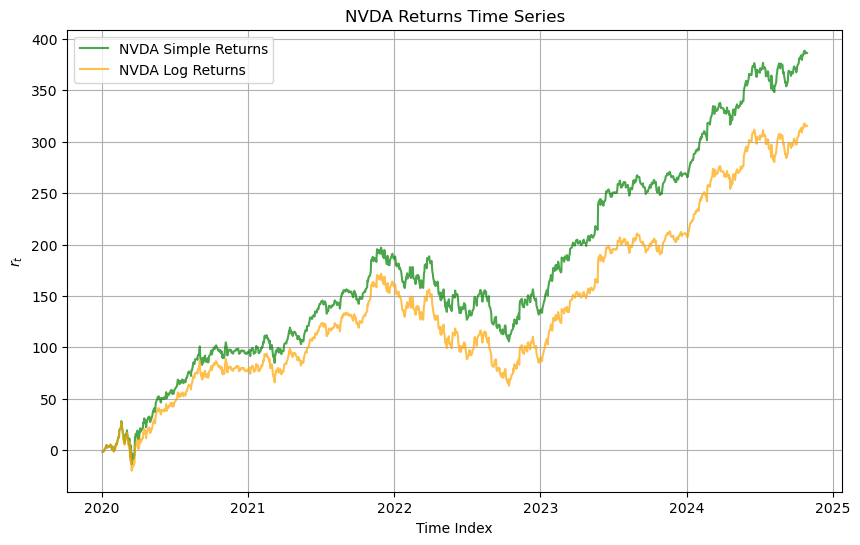

In [8]:
# Time Series Graphs for Cumulative Simple Returns and Log

plt.figure(figsize=(10, 6))
plt.plot(df_nvda['Returns'].cumsum(), label='NVDA Simple Returns', color='green', alpha=0.7)
plt.plot(df_nvda['Log_Returns'].cumsum(), label='NVDA Log Returns', color='orange', alpha=0.7)

# Config
plt.title('NVDA Returns Time Series')
plt.xlabel('Time Index')
plt.ylabel('$r_t$')
plt.legend()

# Show
plt.grid(True)
plt.show()

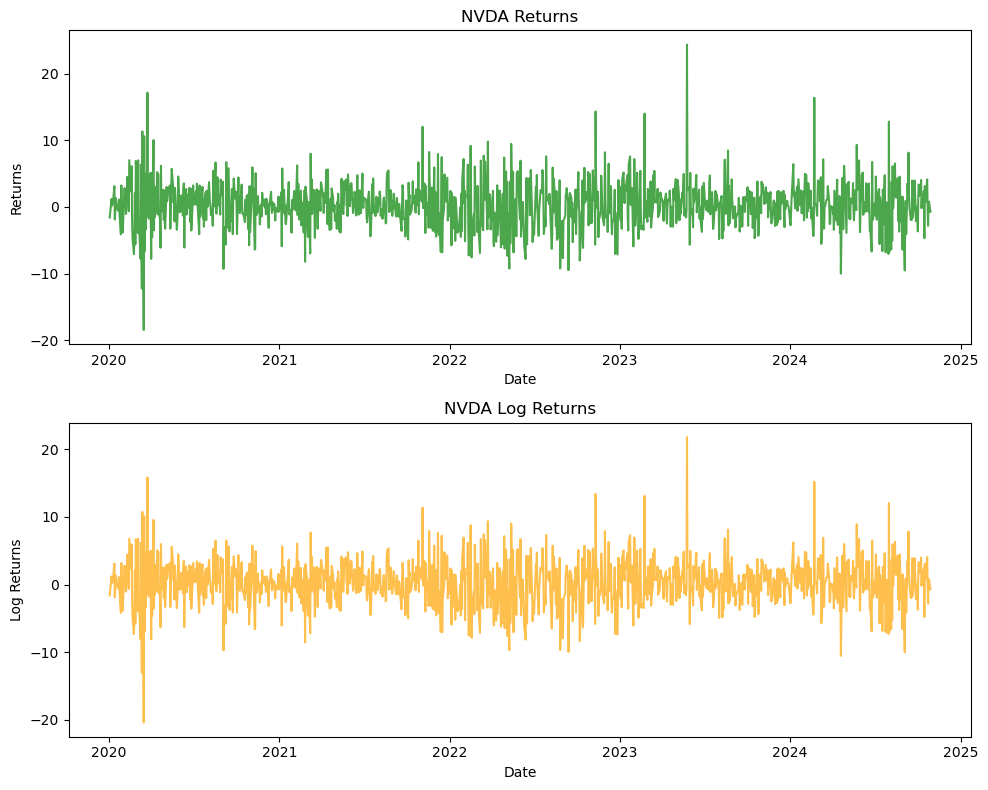

In [9]:
# Time Series Graphs

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].plot(df_nvda['Returns'], color='green', alpha=0.7)
axes[0].set_title('NVDA Returns')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Returns')

axes[1].plot(df_nvda['Log_Returns'], color='orange', alpha=0.7)
axes[1].set_title('NVDA Log Returns')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Log Returns')

plt.tight_layout()

plt.show()

In [10]:
# Let us check the means of the DataFrame

df_nvda.mean()

Open           34.815063
High           35.473439
Low            34.109847
Close          34.827568
Returns         0.318506
Log_Returns     0.260014
dtype: float64

In [11]:
# And the Standard Deviations

df_nvda.std()

Open           33.622419
High           34.242776
Low            32.890504
Close          33.597640
Returns         3.427060
Log_Returns     3.403865
dtype: float64

In [13]:
# Cumulative Returns

c_rets = (1 + df_nvda['Returns'].div(100)).cumprod() - 1
c_rets = c_rets.mul(100)

c_rets

Date
2020-01-03      -1.600600
2020-01-06      -1.187945
2020-01-07       0.008336
2020-01-08       0.195907
2020-01-09       1.296319
                 ...     
2024-10-22    2294.064441
2024-10-23    2226.872577
2024-10-24    2241.044558
2024-10-25    2259.884957
2024-10-28    2242.878579
Name: Returns, Length: 1213, dtype: float64

In [19]:
# The Compound Annual Growth Rate 

initial_vals = df_nvda['Close'].iloc[0]
final_vals = df_nvda['Close'].iloc[-1]

n = 252 # Daily Basis

# Calculate the CAGR
CAGR = np.power(final_vals / initial_vals, (1 / (n - 1))) - 1

print(f"The Compound Annual Growth Rate is: {(CAGR*100).round(3)}")

The Compound Annual Growth Rate is: 1.271


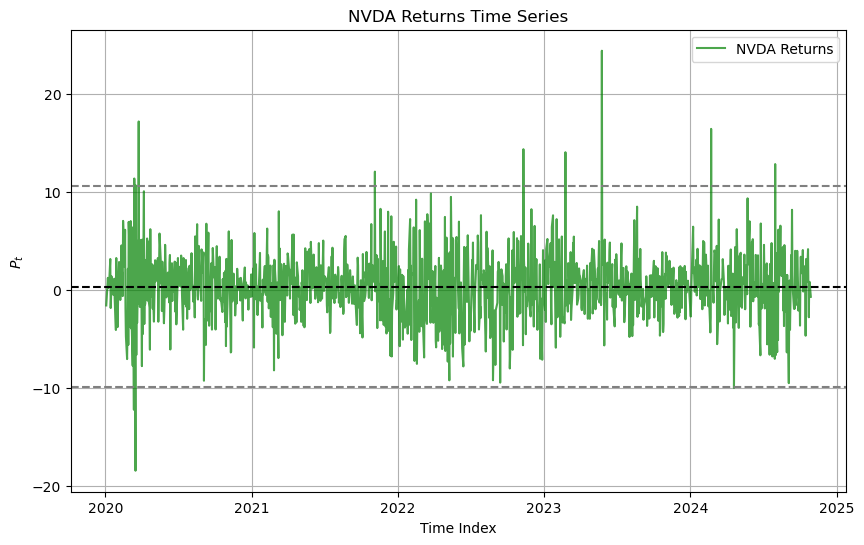

In [20]:
# Time Series Graphs to check Standard Deviation

upper_lim = df_nvda['Returns'].mean() + 3*df_nvda['Returns'].std()
lower_lim = df_nvda['Returns'].mean() - 3*df_nvda['Returns'].std()

plt.figure(figsize=(10, 6))
plt.plot(df_nvda['Returns'], label='NVDA Returns', color='green', alpha=0.7)
plt.axhline(y=df_nvda['Returns'].mean(), color='black', linestyle='dashed')
plt.axhline(y=upper_lim, color='grey', linestyle='dashed')
plt.axhline(y=lower_lim, color='grey', linestyle='dashed')

# Config
plt.title('NVDA Returns Time Series')
plt.xlabel('Time Index')
plt.ylabel('$P_t$')
plt.legend()

# Show
plt.grid(True)
plt.show()

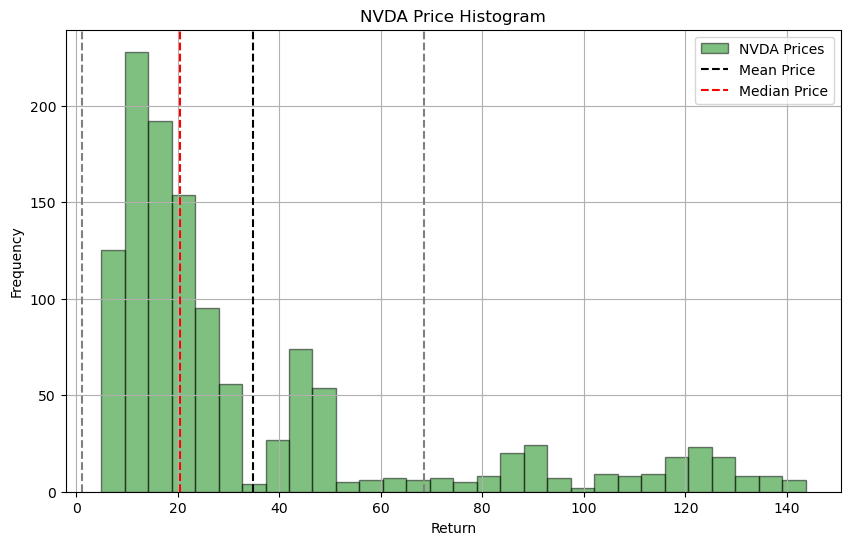

In [21]:
# Create a Histogram of Prices

upper_lim_p = df_nvda['Close'].mean() + df_nvda['Close'].std()
lower_lim_p = df_nvda['Close'].mean() - df_nvda['Close'].std()

plt.figure(figsize=(10, 6))
plt.hist(df_nvda['Close'], bins=30, color='green', alpha=0.5, edgecolor='black', label='NVDA Prices')

# Mean and Standard Deviation
plt.axvline(x=df_nvda['Close'].mean(), color='black', linestyle='dashed', label='Mean Price')
plt.axvline(x=df_nvda['Close'].median(), color='red', linestyle='dashed', label='Median Price')
plt.axvline(x=upper_lim_p, color='grey', linestyle='dashed')
plt.axvline(x=lower_lim_p, color='grey', linestyle='dashed')

# Config
plt.title('NVDA Price Histogram')
plt.xlabel('Return')
plt.ylabel('Frequency')

# Legend and Grid
plt.legend()
plt.grid(True)

# Show
plt.show()

In [18]:
# Let us count how much observations we find inside one std
stds = 1

upper_lim_p = df_nvda['Close'].mean() + stds*df_nvda['Close'].std()
lower_lim_p = df_nvda['Close'].mean() - stds*df_nvda['Close'].std()

inside_one_std = df_nvda[(df_nvda['Close'] >= lower_lim_p) & (df_nvda['Close'] <= upper_lim_p)]

percentage = (len(inside_one_std)/len(df_amzn))*100

print(percentage)

84.84349258649094


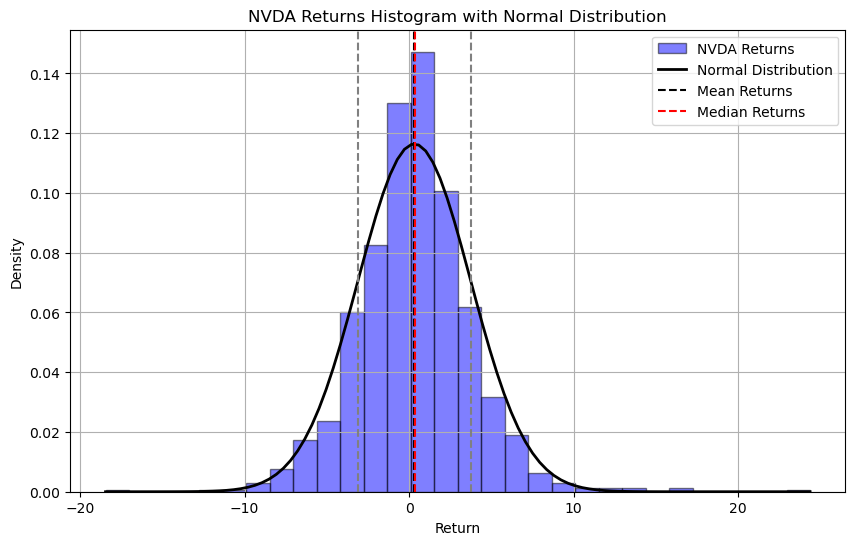

In [22]:
# Calculate Mean and Standard Deviation
mu = df_nvda['Returns'].mean()
sigma = df_nvda['Returns'].std()

# Create Histogram
plt.figure(figsize=(10, 6))
plt.hist(df_nvda['Returns'], bins=30, density=True, color='blue', alpha=0.5, edgecolor='black', label='NVDA Returns')

# Generate the Values of the Normal Distribution
x = np.linspace(df_nvda['Returns'].min(), df_nvda['Returns'].max(), 100)
y = norm.pdf(x, mu, sigma)

# Graph the Real Normal Distribution
plt.plot(x, y, color='black', linestyle='solid', linewidth=2, label='Normal Distribution')

# Reference Lines
plt.axvline(x=mu, color='black', linestyle='dashed', label='Mean Returns')
plt.axvline(x=df_nvda['Returns'].median(), color='red', linestyle='dashed', label='Median Returns')
plt.axvline(x=mu + sigma, color='grey', linestyle='dashed')
plt.axvline(x=mu - sigma, color='grey', linestyle='dashed')

# Config
plt.title('NVDA Returns Histogram with Normal Distribution')
plt.xlabel('Return')
plt.ylabel('Density')

# Legends and Grid
plt.legend()
plt.grid(True)

# Show
plt.show()

In [23]:
# Let us count how much observations we find inside one std
stds = 1

upper_lim = df_nvda['Returns'].mean() + stds*df_nvda['Returns'].std()
lower_lim = df_nvda['Returns'].mean() - stds*df_nvda['Returns'].std()

inside_one_std = df_nvda[(df_nvda['Returns'] >= lower_lim) & (df_nvda['Returns'] <= upper_lim)]

percentage = (len(inside_one_std)/len(df_amzn))*100

print(percentage)

73.14662273476112


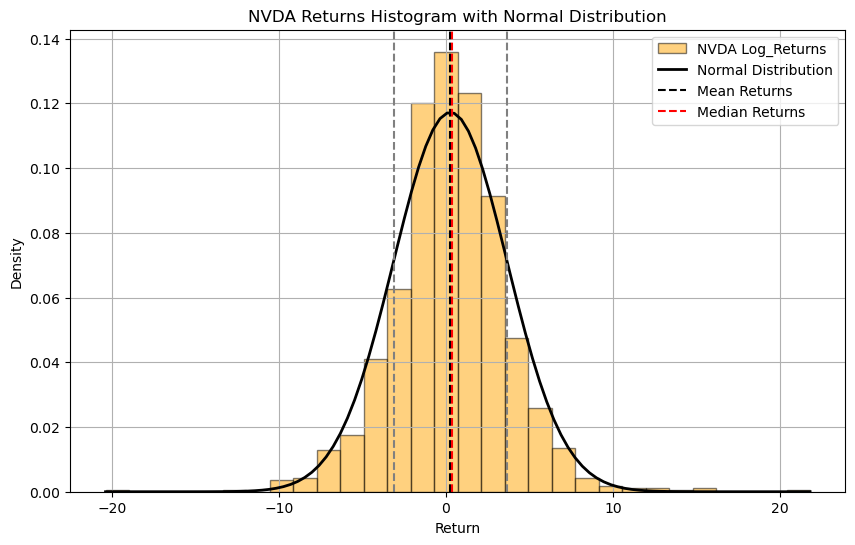

In [30]:
# Calculate Mean and Standard Deviation
mu = df_nvda['Log_Returns'].mean()
sigma = df_nvda['Log_Returns'].std()

# Create Histogram
plt.figure(figsize=(10, 6))
plt.hist(df_nvda['Log_Returns'], bins=30, density=True, color='orange', alpha=0.5, edgecolor='black', label='NVDA Log_Returns')

# Generate the Values of the Normal Distribution
x = np.linspace(df_nvda['Log_Returns'].min(), df_nvda['Log_Returns'].max(), 100)
y = norm.pdf(x, mu, sigma)

# Graph the Real Normal Distribution
plt.plot(x, y, color='black', linestyle='solid', linewidth=2, label='Normal Distribution')

# Reference Lines
plt.axvline(x=mu, color='black', linestyle='dashed', label='Mean Returns')
plt.axvline(x=df_nvda['Log_Returns'].median(), color='red', linestyle='dashed', label='Median Returns')
plt.axvline(x=mu + sigma, color='grey', linestyle='dashed')
plt.axvline(x=mu - sigma, color='grey', linestyle='dashed')

# Config
plt.title('NVDA Returns Histogram with Normal Distribution')
plt.xlabel('Return')
plt.ylabel('Density')

# Legends and Grid
plt.legend()
plt.grid(True)

# Show
plt.show()

In [31]:
# Let us count how much observations we find inside one std
stds = 1

upper_lim = df_nvda['Log_Returns'].mean() + stds*df_nvda['Log_Returns'].std()
lower_lim = df_nvda['Log_Returns'].mean() - stds*df_nvda['Log_Returns'].std()

inside_one_std = df_nvda[(df_nvda['Log_Returns'] >= lower_lim) & (df_nvda['Log_Returns'] <= upper_lim)]

percentage = (len(inside_one_std)/len(df_amzn))*100

print(percentage)

73.06425041186162


In [32]:
# Calculate Skewness
skewness = skew(df_nvda['Log_Returns'].dropna())

# Calculate Kurtosis
kurt = kurtosis(df_nvda['Log_Returns'].dropna())

print(f"Mean: {df_nvda['Log_Returns'].dropna().mean()}")
print(f"Variance: {df_nvda['Log_Returns'].dropna().var()}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")

Mean: 0.26001363796369786
Variance: 11.586294451149806
Skewness: 0.126619666133562
Kurtosis: 3.423154792841199


In [33]:
# Normality Test

jb_stat, p_value = jarque_bera(df_nvda['Log_Returns'].dropna())

print(f"Jarque-Bera Stat: {jb_stat}")
print(f"p-value: {p_value}")

Jarque-Bera Stat: 595.4879258261496
p-value: 4.914053572976287e-130


In [34]:
# Calculate the JB Stat

n = len(df_nvda['Log_Returns'].dropna())
S = skew(df_nvda['Log_Returns'].dropna())
K = kurtosis(df_nvda['Log_Returns'].dropna(), fisher=False) 

JB_stat = (n / 6) * (S**2 + ((K - 3)**2 / 4))

# Calculate p-value
p_value = 1 - chi2.cdf(JB_stat, df=2)

print(f"JB Stat: {JB_stat}")
print(f"p-value: {p_value}")

JB Stat: 595.4879258261496
p-value: 0.0


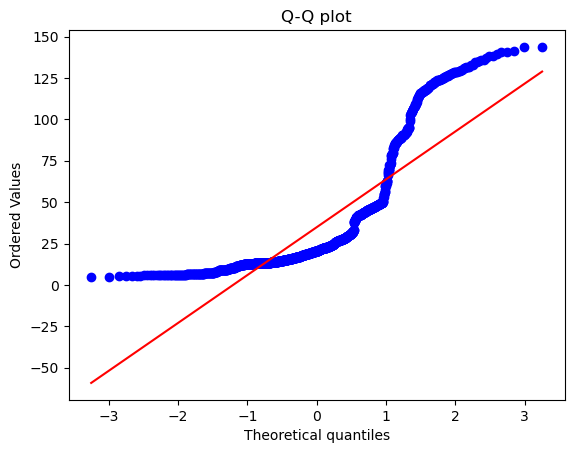

In [35]:
# Prices QQ Plot

probplot(df_nvda['Close'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q plot')
plt.show()

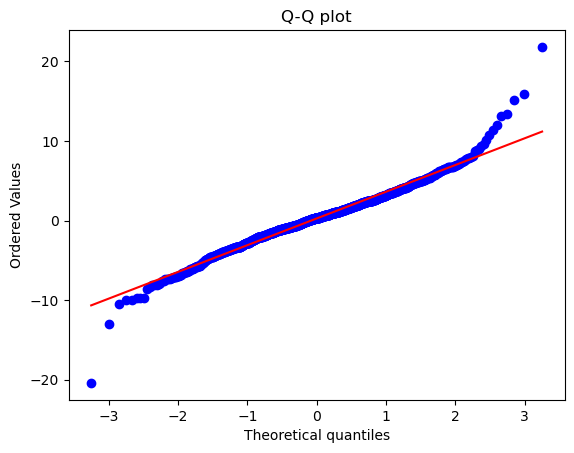

In [36]:
# Returns QQ Plot

probplot(df_nvda['Log_Returns'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q plot')
plt.show()

In [37]:
# Anderson Test

result = anderson(df_nvda['Log_Returns'].dropna())

print(f"Anderson-Darling Stat: {result.statistic}")
print(f"Critical Values: {result.critical_values}")
print(f"Significance Level: {result.significance_level}")

Anderson-Darling Stat: 4.867765220015372
Critical Values: [0.574 0.654 0.784 0.915 1.088]
Significance Level: [15.  10.   5.   2.5  1. ]
